In [406]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import cv2 as cv
%matplotlib inline
from PIL import Image
from PIL import ImageFilter
import pandas as pd
import math
import seaborn as sns
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected = True)
cf.go_offline()

In [571]:
colourImg = Image.open('hard.png')
colourPixels = colourImg.convert("RGB")
colourArray = np.array(colourPixels.getdata()).reshape(colourImg.size + (3,))
indicesArray = np.moveaxis(np.indices(colourImg.size), 0, 2)
allArray = np.dstack((indicesArray, colourArray)).reshape((-1, 5))
df = pd.DataFrame(allArray, columns=["y", "x", "red","green","blue"])
cols = list(df)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('x')))
df = df.loc[:, cols]

In [533]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194304 entries, 0 to 4194303
Data columns (total 5 columns):
x        int64
y        int64
red      int64
green    int64
blue     int64
dtypes: int64(5)
memory usage: 160.0 MB


In [572]:
df_red = df.copy()
df_green = df.copy()
df_yellow = df.copy()
#TO FILTER OUT RED
df_red = df_red.drop(df_red[df_red.red < 252].index)
df_red = df_red.drop(df_red[df_red.green >130].index)
#TO FILTER OUT GREEN
df_green = df_green.drop(df_green[df_green.red > 250].index)
df_green = df_green.drop(df_green[df_green.green < 140].index)
df_green = df_green.drop(df_green[df_green.blue > 110].index)
#TO FILTER OUT YELLOW
df_yellow = df_yellow.drop(df_yellow[df_yellow.red < 240 ].index)
df_yellow = df_yellow.drop(df_yellow[df_yellow.green < 210].index)
df_yellow = df_yellow.drop(df_yellow[df_yellow.blue > 100].index)




In [525]:
df_yellow.head(20)

,x,y,red,green,blue
49992,840,24,255,255,23
49998,846,24,255,255,23
50000,848,24,255,255,23
50010,858,24,255,255,23
52045,845,25,255,255,23
52050,850,25,255,255,24
52062,862,25,255,255,22
54092,844,26,255,255,24
54098,850,26,255,255,24
54109,861,26,255,255,24


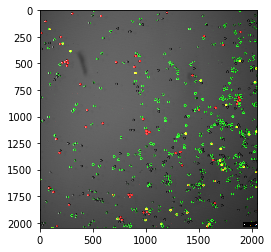

In [529]:
plt.imshow(colourPixels)

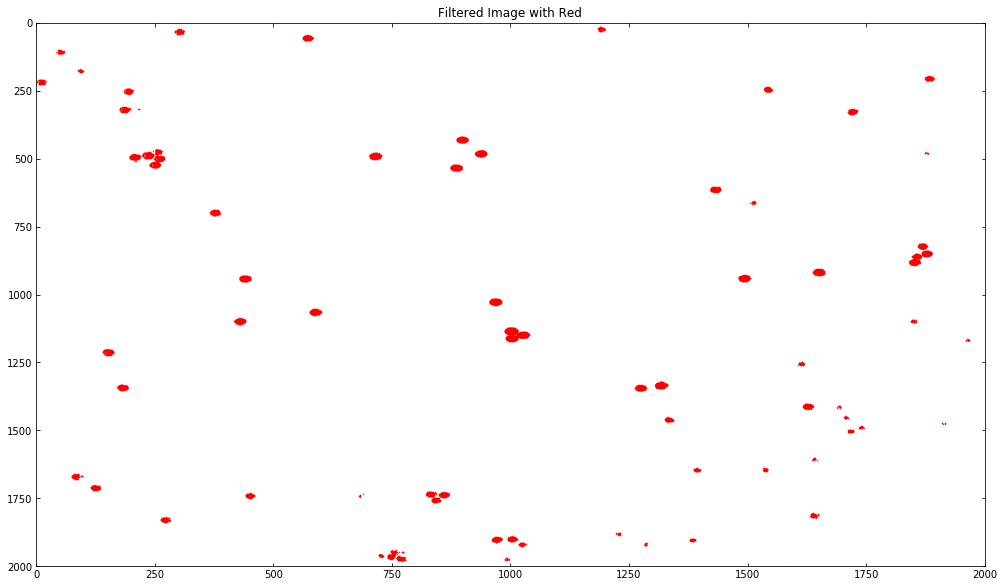

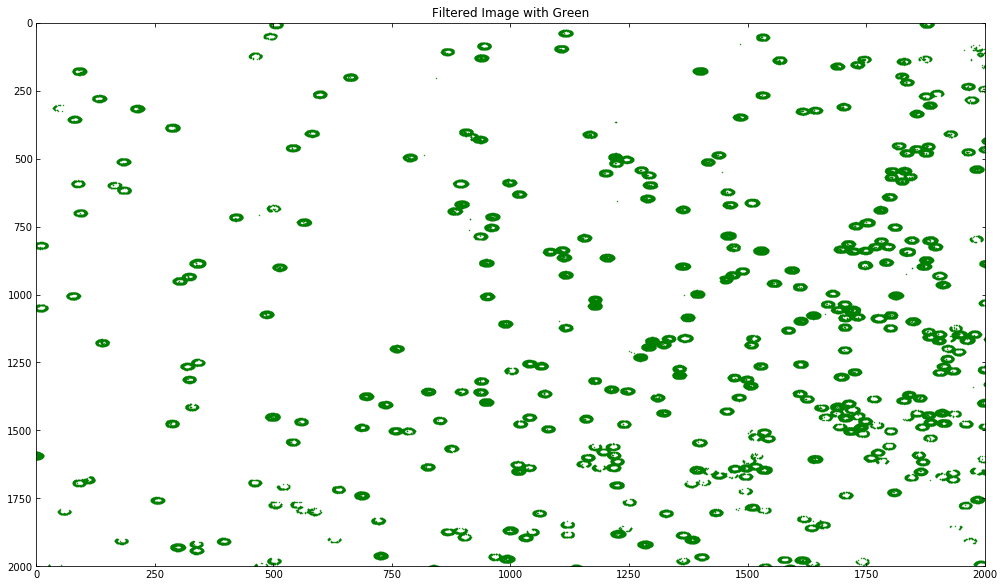

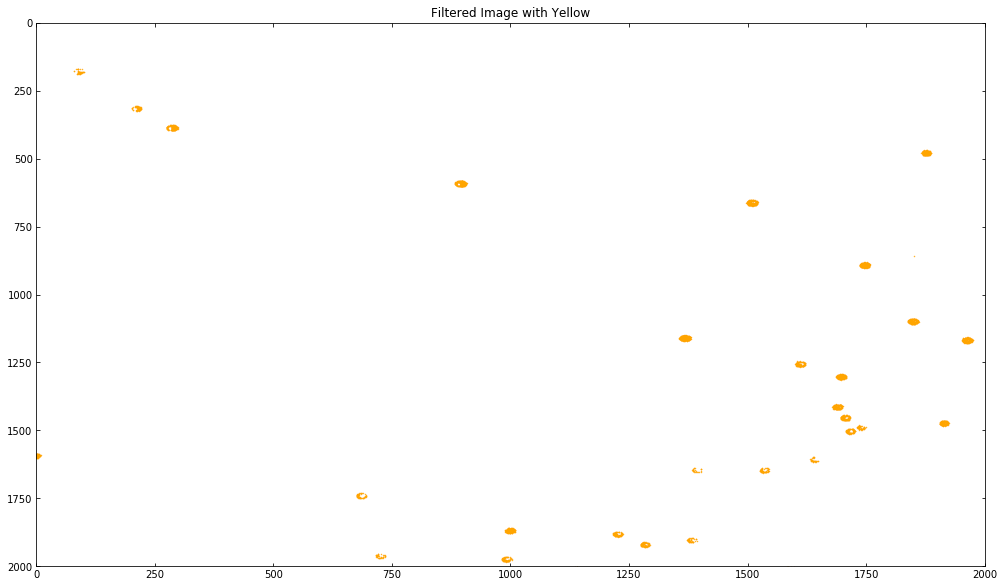

In [573]:
plt.figure(figsize=(17,10))
plt.xlim(0, 2000)
plt.ylim(0, 2000)
plt.scatter(df_red['x'],df_red['y'],c='red',s = 0.2)
plt.title("Filtered Image with Red")   
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major', grid_color='blue')
plt.gca().invert_yaxis()
plt.show()



plt.figure(figsize=(17,10))
plt.xlim(0, 2000)
plt.ylim(0, 2000)
plt.scatter(df_green['x'],df_green['y'],c='green',s = 0.2)
plt.title("Filtered Image with Green")   
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major', grid_color='blue')
plt.gca().invert_yaxis()
plt.show()



plt.figure(figsize=(17,10))
plt.xlim(0, 2000)
plt.ylim(0, 2000)
plt.scatter(df_yellow['x'],df_yellow['y'],c='orange', s = 0.2)
plt.title("Filtered Image with Yellow")   
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major', grid_color='blue')
plt.gca().invert_yaxis()
plt.show()


In [576]:
data = {'Red Concentration':  [len(df_red)/len(df)*100],
        'Green Concentration': [len(df_green)/len(df)*100],
        'Yellow Concentration': [len(df_yellow)/len(df)*100],
         
        }

main = pd.DataFrame (data, columns = ['Red Concentration','Green Concentration','Yellow Concentration'])

In [577]:
main.head()

,Red Concentration,Green Concentration,Yellow Concentration
0,1301900.0,11657400.0,501000.0


In [ ]:
def nothing(x):
    
    pass


cv2.namedWindow("Tracking")
cv2.createTrackbar("LH", "Tracking", 0, 255, nothing)
cv2.createTrackbar("LS", "Tracking", 0, 255, nothing)
cv2.createTrackbar("LV", "Tracking", 0, 255, nothing)
cv2.createTrackbar("UH", "Tracking", 0, 255, nothing)
cv2.createTrackbar("US", "Tracking", 0, 255, nothing)
cv2.createTrackbar("UV", "Tracking", 0, 255, nothing)

while True:
        img = cv2.imread('oneo.png')
 

        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        
        l_h = cv2.getTrackbarPos("LH", "Tracking")
        l_s = cv2.getTrackbarPos("LS", "Tracking")
        l_v = cv2.getTrackbarPos("LV", "Tracking")
        
        
        u_h = cv2.getTrackbarPos("UH", "Tracking")
        u_s = cv2.getTrackbarPos("US", "Tracking")
        u_v = cv2.getTrackbarPos("UV", "Tracking")

        l_b = np.array([l_h,l_s,l_v])
        u_b = np.array([u_h,u_s,u_v])


        mask = cv2.inRange(hsv, l_b, u_b)
        res = cv2.bitwise_and(img , img , mask = mask)
           
        cv2.namedWindow('Resized Window', cv2.WINDOW_NORMAL)

      
        cv2.imshow("output" , img)
      
        cv2.imshow("mask" , mask)
        
        cv2.imshow("res" , res)
        
        key = cv2.waitKey(1)
        if key == 27:
            break
            
cv2.DestroyAllWindows()
        

In [ ]:
    cv2.namedWindow('Resized Window', cv2.WINDOW_NORMAL)

        cv2.imshow("output" , img)      
        cv2.imshow("mask" , mask)
        cv2.imshow("res" , res)